## Reservation matrices mobility data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Sans',
        'size'   : 15}
matplotlib.rc('font', **font)

### Read data

There are two matrices: the station matrix and the SOC matrix. Both are saved as csv files.
Both matrices have one row per vehicle and one column per discrete time slot.

In [3]:
station_matrix = pd.read_csv("../outputs/input_matrices_v3/station_matrix.csv", index_col="vehicle_no")
soc_matrix = pd.read_csv("../outputs/input_matrices_v3/soc_matrix.csv", index_col="vehicle_no")

### Encoding station_matrix:

* -1: Not sure whether the vehicle is part of the fleet yet. We are still waiting for data from mobility that shows when each vehicle was added to a station
* 0: Vehicle is in use
* \>0: ID of the station where the vehicle is located


In [ ]:
station_matrix

In [ ]:
# Stats
uni, counts = np.unique(station_matrix, return_counts=True)
print("The overall time is divided between")
print((counts[uni==-1]/ np.sum(counts))[0]*100, "% before the first appearance of an EV")
print((counts[uni==0] / np.sum(counts))[0]*100, "% car is driving")
print(np.sum(counts[uni>0]) / np.sum(counts) * 100, "% car is standing at a station")

### Encoding soc_matrix:

Matrix shows the required SOC at departure and arrival times

* The values are the relative SOC per vehicle (in % of the battery capacity) --> between 0 and 1
* Linear charging curve is assumed
* Only the min SOC at arrival and departure times are given --> TODO: Should I directly interpolate for the time slots inbetween?
* **The departure SOC is saved at the first time slot of the reservation period, and the arrival SOC at the last position of the reservation period**

In [ ]:
soc_matrix

In [ ]:
# Example for one vehicle:
example_veh = soc_matrix.loc[130866].reset_index()
greater_0 = example_veh[example_veh[130866]>0]
ticks = greater_0["index"]
vals = greater_0[130866]
tick_pos = np.where(example_veh[130866].values>0)[0]
plt.figure(figsize=(20,5))
plt.scatter(tick_pos, vals)
plt.xticks(tick_pos, ticks, rotation=90)
plt.ylabel("Minimum SOC at arrival / departure times")
plt.show()

In [ ]:
soc_arr = np.array(soc_matrix)
station_arr = np.array(station_matrix)
np.any(station_arr[soc_arr >0])

## Example

The following figure shows both matrices for a small excerpt of the data (50 vehicles and 50 timeslots = 25 hours) - randomly selected only for demonstration

Note: The zeros are set to NaN only here for plotting

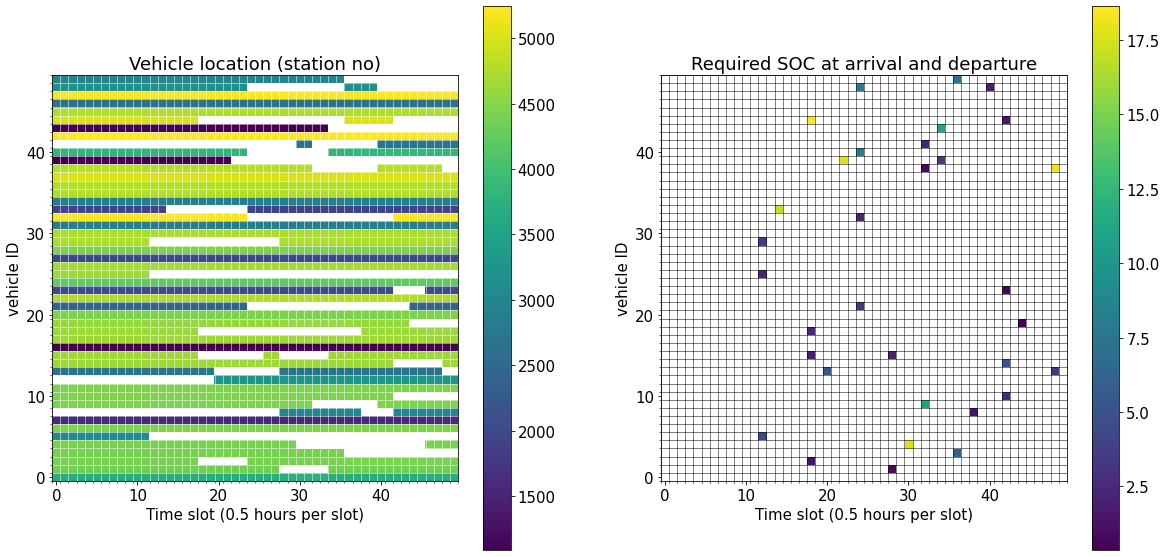

In [4]:
plt.figure(figsize=(20,10))
# plot
ax = plt.subplot(1, 2, 1)
for_plot = np.array(station_matrix)[:50, 10000:10050]
for_plot[for_plot <= 0] = np.nan
plt.imshow(for_plot)
ax.set_xticks(np.arange(-.5, 50, 1), minor=True)
ax.set_yticks(np.arange(-.5, 50, 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=.5)
plt.ylim(-0.5, 49.5)
plt.ylabel("vehicle ID")
plt.xlabel("Time slot (0.5 hours per slot)")
plt.title("Vehicle location (station no)")
plt.colorbar()

ax = plt.subplot(1, 2, 2)
for_plot = np.array(soc_matrix)[:50, 10000:10050]
for_plot[for_plot <= 0] = np.nan
plt.imshow(for_plot)
ax.set_xticks(np.arange(-.5, 50, 1), minor=True)
ax.set_yticks(np.arange(-.5, 50, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(-0.5, 49.5)
plt.ylabel("vehicle ID")
plt.xlabel("Time slot (0.5 hours per slot)")
plt.title("Required SOC at arrival and departure")
plt.colorbar()
plt.show()